In [6]:
import numpy
import matplotlib.pyplot as plt

**Random population**

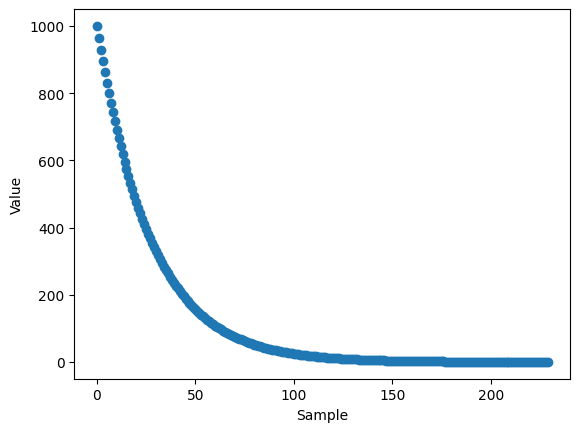

In [27]:
population_size = int(2.3e5)

population = 1 / numpy.logspace(numpy.log10(0.001), numpy.log10(5), population_size)

plt.plot(population[::int(1e3)], 'o')
plt.xlabel('Sample')
plt.ylabel('Value')

plt.show()

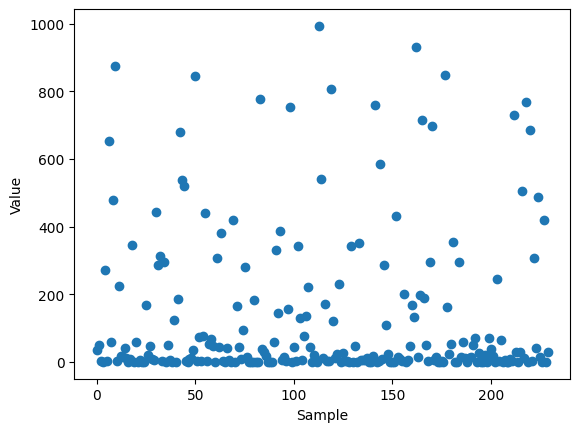

In [25]:
numpy.random.shuffle(population)

plt.plot(population[::int(1e3)], 'o')
plt.xlabel('Sample')
plt.ylabel('Value')

plt.show()

**Monte Carlo sampling**

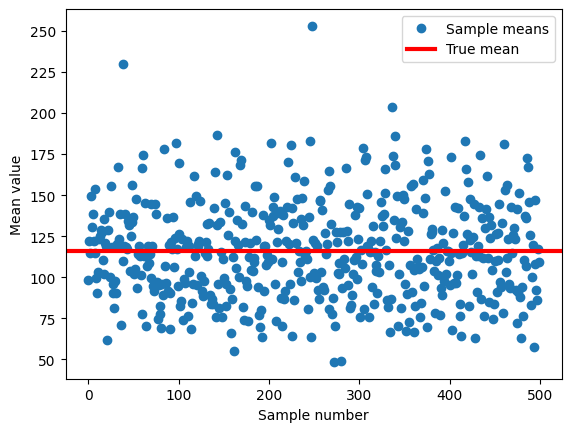

In [78]:
def make_sample():
    means = []
    for i in range(sample_amount):
        random_sample = numpy.random.choice(population, size=sample_size)
        means.append(numpy.mean(random_sample))

    return means

sample_size = 50
sample_amount = 500

means = make_sample()
true_mean = numpy.mean(means)

plt.plot(means, 'o', label='Sample means')
plt.axhline(true_mean, color='r', linewidth=3, label='True mean')

plt.xlabel('Sample number')
plt.ylabel('Mean value')

plt.legend()
plt.show()

**Cumulative averaging**

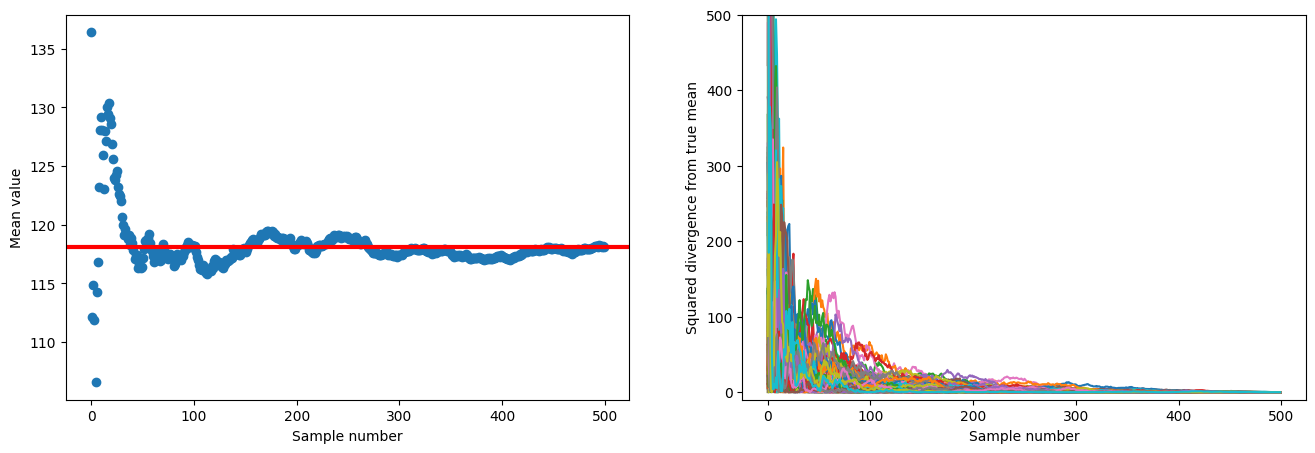

In [90]:
current_sum = 0
averages = []
for i in range(1, sample_amount + 1):
    current_sum = current_sum + means[i - 1]
    average = current_sum / i
    averages.append(average)

plt.figure(figsize=(16, 5))

# First plot (cumulative averages)
plt.subplot(1, 2, 1)
plt.plot(averages, 'o')
plt.axhline(true_mean, color='r', linewidth=3, label='True mean')

plt.xlabel('Sample number')
plt.ylabel('Mean value')

# Second plot (divergences)
divergences = []
for i in range(100):
    current_divergences = []
    means = make_sample()
    true_mean = numpy.mean(means)
    current_sum = 0
    for j in range(1, sample_amount + 1):
        current_sum = current_sum + means[j - 1]
        average = current_sum / j
        squared_difference = (true_mean - average) ** 2
        current_divergences.append(squared_difference)
    divergences.append(current_divergences)

plt.subplot(1, 2, 2)
for divergence in divergences:
    plt.plot(divergence)

plt.ylim([-10, 500])

plt.xlabel('Sample number')
plt.ylabel('Squared divergence from true mean')

plt.show()